# Condensed Matter Physics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1

## Question 1

**1. (v) $\mu$ vs $T$**

In [2]:
kB = 8.625e-5
EF1 = 5

In [3]:
def mu_T(T, EF):
    return kB*T*np.log(np.exp(EF/(kB*T)) - 1)

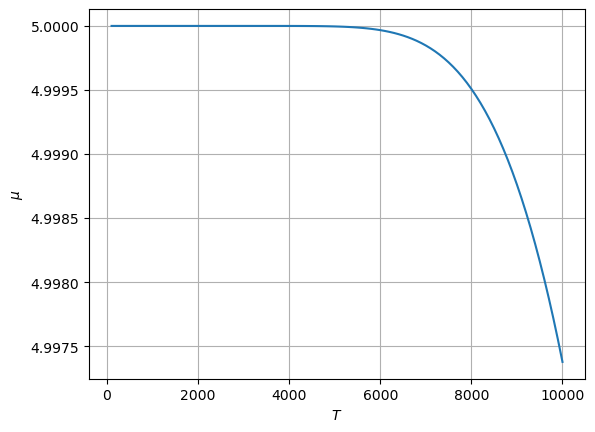

In [4]:
T1 = np.linspace(100, 1e4, 100)
plt.plot(T1, mu_T(T1, EF1))
plt.xlabel('$T$')
plt.ylabel('$\mu$')
plt.grid()
plt.savefig('asg11.png', dpi=150)
plt.show()

Thus $\mu$ is approximately constant over these values.

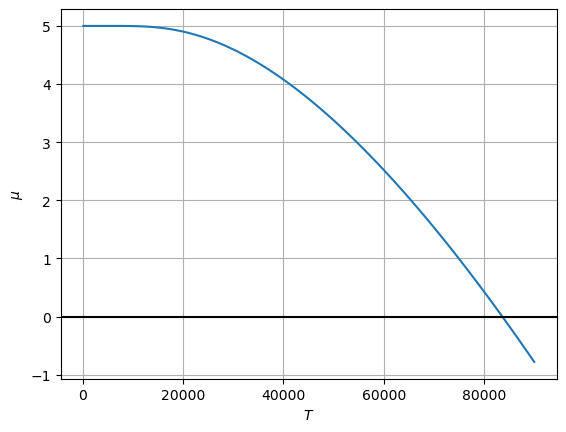

In [5]:
T1 = np.linspace(100, 9e4, 100)
plt.plot(T1, mu_T(T1, EF1))
plt.axhline(0, color='black')
plt.xlabel('$T$')
plt.ylabel('$\mu$')
plt.grid()
plt.savefig('asg12.png', dpi=150)
plt.show()

**1. (vi) Difference between $\mu$ and $\epsilon_F$:**

In [6]:
mu_ep_diff = lambda T, EF: kB*T*np.log(1 - np.exp(-EF/(kB*T)))
EF1, T1 = 7, 300
print(f'EF1={EF1} eV, T1={T1} K, mu-ep_F={mu_ep_diff(T1, EF1)} eV')
EF1, T1 = 1, 1e4
print(f'EF1={EF1} eV, T1={T1} K, mu-ep_F={mu_ep_diff(T1, EF1)} eV')

EF1=7 eV, T1=300 K, mu-ep_F=0.0 eV
EF1=1 eV, T1=10000.0 K, mu-ep_F=-0.3246396109830434 eV
